# Part 1: Data Preprocessing

In [2]:
# Data Preprocessing
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Data Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Model Evaluation and Comparison
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

### Reading dataset
#### Steps
##### Convert dataset into a Pandas DataFrame using the pd.read_csv() method, then view the DataFrame using df.head() function

In [3]:
df = pd.read_csv("Resources/tmdb_5000_movies.csv", index_col=0)

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war, space colony...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...",...,2787965087,162.0,"English, Español",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",...,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24",...,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",...,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,...,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


In [4]:
df.shape

(4803, 22)

### Defining Target Variables

#### Steps
##### Create a new column in df called profitable, defined as 1 if the movie revenue is greater than the movie budget, and 0 otherwise.
#### Next,  define and store the outcomes we will use for regression and classification as such -- regression_target as the string 'revenue' & classification_target as the string 'profitable'.

In [5]:
regression_target = 'revenue'
classification_target = 'profitable'

In [6]:
# Creating the 'profitable' column
df['profitable'] = df.revenue > df.budget
df['profitable'] = df['profitable'].astype(int)

In [7]:
# Printing the types of Value and their Count in the 'profitable' column 
df["profitable"].value_counts()

1    2585
0    2218
Name: profitable, dtype: int64

### Removing null, unwanted or infinite values
#### Proceed by analyzing only the rows without any missing data. First replace the null values of all unimportant data to reduce data loss and then remove rows with any infinite or missing values.

#### Steps
##### Check the number of null values or np.nan values by using df.isnull().sum()
##### Use df.drop() to remove any columns that are unimportant.
##### Check if the important columns contain value = 0. We replace the 0 values of the budget column with np.nan because the budget of a movie cannot be 0 even if the revenue might be.
##### Create a column which shows the return gained or lost from the movie production.
##### Use df.replace() to replace any cells from the resultant dataset with type np.inf or -np.inf with np.nan.
##### Drop all rows with any np.nan values in that row using df.dropna().
##### Use the inplace=True argument to immediately reflect the changes in the current dataset.

In [8]:
#number of missing values in the dataset
df.isnull().sum()

budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
spoken_languages          87
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                      43
profitable                 0
dtype: int64

In [9]:
# Is the Original Title column needed or not
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


In [10]:
# Dropping the unimportant columns 
df.drop(['homepage','production_companies', 'production_countries', 'spoken_languages', 'original_title'], axis=1, inplace=True)

In [11]:
# Checking the number of values for which "Revenue" column contains "0"
df[df['revenue'] == 0].shape

(1427, 18)

In [12]:
# Checking the amount of null values present in Budget column
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(1037, 18)

In [13]:
# Creating a column which shows the return from the movie production and checking the amount of null values  
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(1037, 19)

In [14]:
# Replacing any infinite values with np.nan and then dropping all rows of data containing missing values
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(how="any", inplace=True)

In [15]:
# Checking the final dimensions of the dataset
df.shape

(3266, 19)

In [16]:
df.isnull().sum()

budget               0
genres               0
id                   0
keywords             0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
tagline              0
title                0
vote_average         0
vote_count           0
movie_id             0
cast                 0
profitable           0
return               0
dtype: int64

### Feature Engineering
#### Encoding of Genres Column
##### Add indicator columns for each genre.

#### Steps
##### Determine all the genres in the genre column and make use of the strip() function on each genre to remove trailing characters
##### Include each listed genre as a new column in the dataframe. Each element of these genre columns is 1 if the movie belongs to that particular genre, and 0 otherwise, keeping in mind, a movie may belong to several genres at once

In [17]:
# Determining and Storing the Genres
list_genres = df.genres.apply(lambda x: x.split(","))
genres = []

for row in list_genres:
    row = [genre.strip() for genre in row]
    for genre in row:
        if genre not in genres:
            genres.append(genre)

# Encoding the Genres
for genre in genres:
    df[genre] = df['genres'].str.contains(genre).astype(int)

df[genres]

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4791,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4792,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
4796,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Creating the Year column for analysis
#### Steps
##### Create a new column, year the year of production of a movie from the given format of release_date is  extracted and stored

In [18]:
df['release_date'].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [19]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0])

In [20]:
df['year'].isnull().sum()

0

## Feature Selection
#### Some variables in the dataset are already numeric and perhaps useful for regression and classification. Store the names of these variables for future use. Also view  some of the continuous variables and outcomes by plotting each pair in a scatter plot. Evaluate the skew of each variable.

### Steps
#### Call plt.show() to observe the plot shown below to find which of the variables and/or outcomes are correlated with each other.
#### Call skew() on the columns outcomes_and_continuous_variables in the dataset and check the features for which the skew is above 1.

In [21]:
# For Graphs and its labels to be printed on a White Frame
sns.set_style('whitegrid') 
# For increasing the scale of the font of the Labels of the Graphs
sns.set(font_scale=1.25) 

budget          2.103303
popularity      9.326919
runtime         1.716690
vote_count      3.256260
vote_average   -0.707662
revenue         3.852964
profitable     -0.842966
dtype: float64


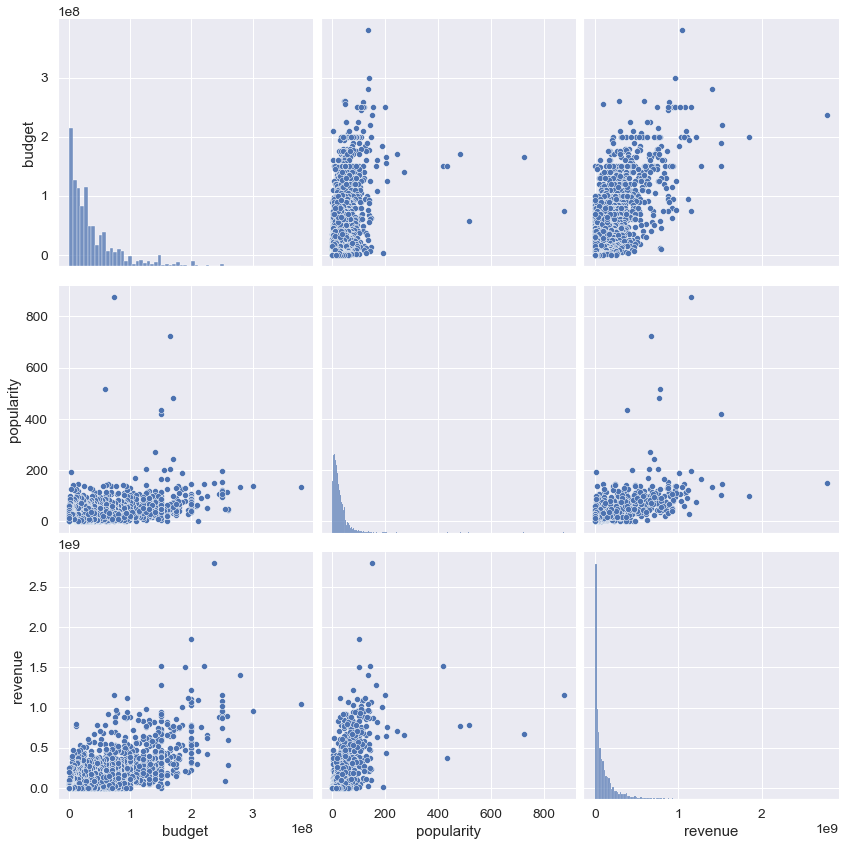

In [22]:
continuous = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes = continuous + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

sns.pairplot(data=df[plotting_variables], height=4)

# determining the skew.
print(df[outcomes].skew())

#### Appears that the variables budget, popularity, runtime, vote_count, and revenue are all right-skewed.
#### Only vote_average and profitable are the data with negative value and all the others contain positive or right skewdness.

### Feature Transformation 
#### Transform these variables to eliminate this skewness, using the np.log10() method. Because some of these variable values are exactly 0, a small positive value will be added to each to ensure it is defined; this is necessary because log(0) is negative infinity.

### Steps
#### For each above-mentioned variable in the dataset df, transform the value x into np.log10(1+x)

In [23]:
# Eliminating skewness for each Variable
for variable in ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']:
    df[variable] = df[variable].apply(lambda x: np.log10(1+x))

budget         -3.117974
popularity     -0.325490
runtime        -4.081196
vote_count     -0.451869
vote_average   -0.707662
revenue        -2.164551
profitable     -0.842966
dtype: float64


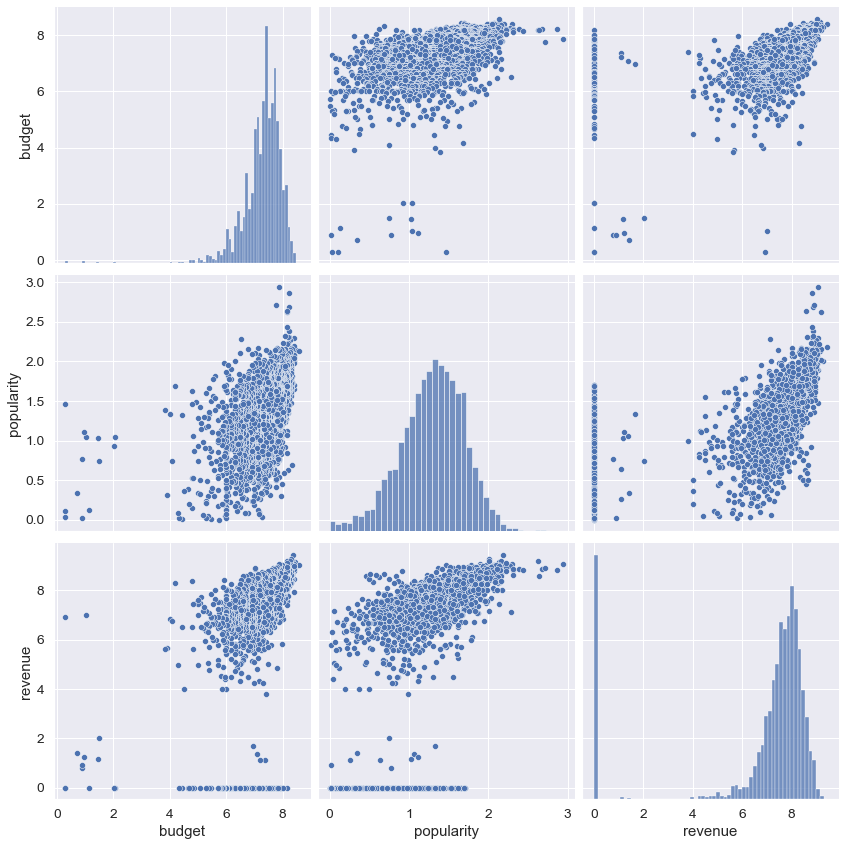

In [24]:
sns.pairplot(data=df[plotting_variables], height=4)

print(df[outcomes].skew())

#### Skewness has been eliminated
#### All the variables have a negative value.

### Storing the transformed dataset


### Steps
#### We use to_csv() to save the df object as movies_clean.csv.

In [25]:
# Enter your code here
df.to_csv("Resources/movies_clean.csv")

# Part 2: Exploratory Data Analysis
## Analyze the important segments of the dataset and try to gain valuable insights from it

In [26]:
# Reading the cleaned dataset
df_clean = pd.read_csv("Resources/movies_clean.csv", index_col=0)
df_clean.head()

,budget,genres,id,keywords,original_language,overview,popularity,release_date,revenue,runtime,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,year
0,8.374748,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,"In the 22nd century, a paraplegic Marine is di...",2.180234,2009-12-10,9.445287,2.212188,...,0,0,0,0,0,0,0,0,0,2009
1,8.477121,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,"Captain Barbossa, long believed to be dead, ha...",2.146384,2007-05-19,8.982723,2.230449,...,0,0,0,0,0,0,0,0,0,2007
2,8.389166,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,A cryptic message from Bond’s past sends him o...,2.034936,2015-10-26,8.944815,2.173186,...,0,0,0,0,0,0,0,0,0,2015
3,8.397940,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,Following the death of District Attorney Harve...,2.054280,2012-07-16,9.035405,2.220108,...,0,0,0,0,0,0,0,0,0,2012
4,8.414973,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,"John Carter is a war-weary, former military ca...",1.652507,2012-03-07,8.453531,2.123852,...,0,0,0,0,0,0,0,0,0,2012


### Statistical Analysis

In [27]:
# Analysing all the features from a statistical point of view
df_clean.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,profitable,return,...,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,year
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3.266000e+03,...,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,7.278334,45488.042254,1.292131,6.855850,2.038060,6.271341,2.604175,45488.042254,0.694121,2.919456e+03,...,0.176363,0.115738,0.085119,0.040416,0.033068,0.034293,0.009186,0.001225,0.000612,2001.765769
std,0.740971,77053.912258,0.405928,2.486905,0.082333,0.894677,0.631083,77053.912258,0.460849,1.497546e+05,...,0.381187,0.319959,0.279102,0.196964,0.178841,0.182008,0.095415,0.034980,0.024742,12.953301
min,0.301030,5.000000,0.000688,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1916.000000
25%,7.000000,5307.500000,1.041590,7.030228,1.986772,5.700000,2.204120,5307.500000,0.000000,7.362006e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000
50%,7.397940,11317.000000,1.317127,7.695402,2.029384,6.300000,2.645913,11317.000000,1.000000,2.085807e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000
75%,7.740363,44698.250000,1.575985,8.146561,2.082785,6.900000,3.042477,44698.250000,1.000000,4.180151e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
max,8.579784,417859.000000,2.942792,9.445287,2.530200,8.500000,4.138397,417859.000000,1.000000,8.500000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000


### Observations:
#### Shows the count of all the features as 3266 confirming that the data present in the dataset is constant and doesn't contain any discrepancies.
#### Shows the mean of all the features and can clearly see that all the numerical features have been normalized to their log10 counterparts.
#### Shows us the maximum and minimum values present in each feature.

### Correlation Analysis

<AxesSubplot:>

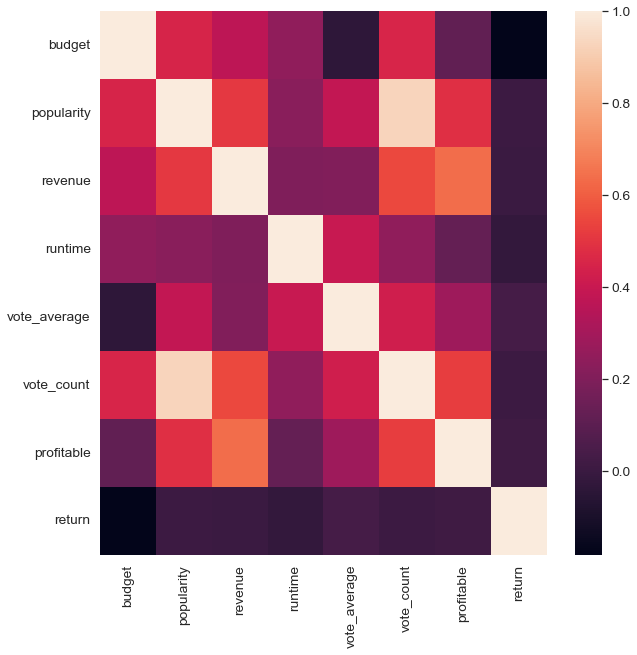

In [28]:
# Plotting the correlation heatmap of all the features
plt.figure(figsize=(10, 10))
sns.heatmap(df_clean.iloc[:,:19].drop(['id', 'movie_id'], axis=1).corr())

### Observations:
#### Most of the features have Pearson's Correlation Coefficient between 0.3 and 0.7 meaning that they have some relation between them.
#### The "return" feature is solely created for visualization so it is irrelevant to all the features

### Regression Target Analysis

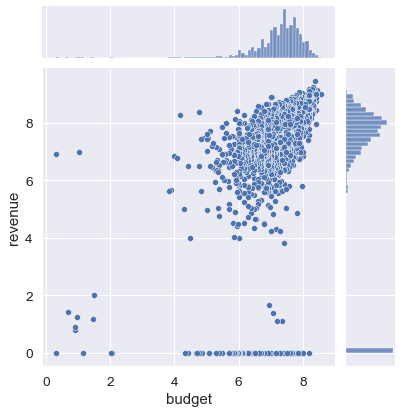

In [29]:
# plotting the correlation graph between revenue and budget
sns.jointplot(x='budget', y='revenue', data=df_clean)

### Observations:
#### Strong corelation between budget and revenue
#### Quite a few number of outliers are present
#### The relation is mostly linear

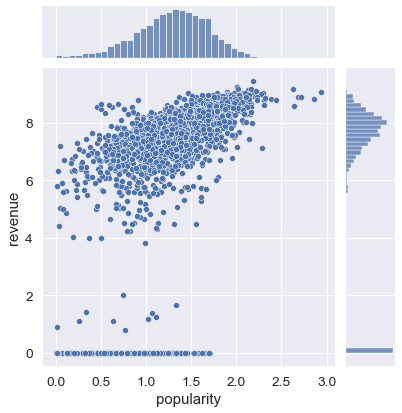

In [30]:
# plotting the correlation graph between revenue and popularity
sns.jointplot(x='popularity', y='revenue', data=df_clean)

### Observations:
#### Some corelation between revenue and popularity
#### Quite a few number of outliers are present
#### The relation is mostly linear

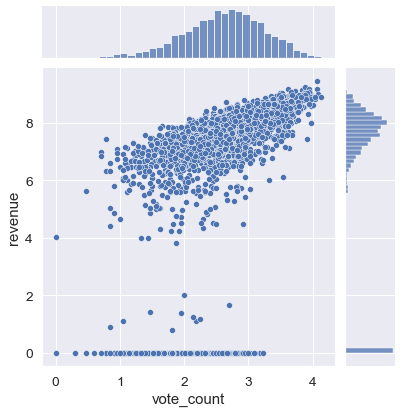

In [31]:
# plotting the correlation graph between revenue and vote_count
sns.jointplot(x='vote_count', y='revenue', data=df_clean)

### Observations:
#### Strong corelation between revenue and vote_count is observed
#### To have a good return is mostly necessary to also have a good critical score
#### Some outliers present
#### The relation is strongly linear

#### This proves that Predicting "revenue" would require Regression model and thus I will be using - "Linear Regression" and "Random Forest Regression"

### Movie return Trend analysis over the years

In [32]:
# Sorting out the title, vote_count and year to check the movies with highest vote_counts ever
df_clean[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
96,Inception,4.138397,2010
65,The Dark Knight,4.079290,2008
0,Avatar,4.071919,2009
16,The Avengers,4.071035,2012
788,Deadpool,4.041235,2016
95,Interstellar,4.036150,2014
287,Django Unchained,4.004321,2012
94,Guardians of the Galaxy,3.988693,2014
426,The Hunger Games,3.975707,2012
127,Mad Max: Fury Road,3.974420,2015


In [33]:
# Storing the same part of the Dataframe with revenue and return in a variable
high_return = df_clean[['title', 'vote_count', 'year','revenue','return']].sort_values('vote_count', ascending=False)

In [34]:
np.log10(1000000000)

9.0

In [35]:
# Storing only the movies with a very high revenue, specifically revenue > 1,00,00,00,000 or 1 billion
high_return = high_return[high_return['revenue']>=9]
high_return.head(10)

,title,vote_count,year,revenue,return
65,The Dark Knight,4.079290,2008,9.001975,5.430046
0,Avatar,4.071919,2009,9.445287,11.763566
16,The Avengers,4.071035,2012,9.181717,6.907081
3,The Dark Knight Rises,3.959375,2012,9.035405,4.339756
31,Iron Man 3,3.944828,2013,9.084734,6.077200
28,Jurassic World,3.937668,2015,9.179991,10.090192
98,The Hobbit: An Unexpected Journey,3.918973,2012,9.009070,4.084414
329,The Lord of the Rings: The Return of the King,3.906604,2003,9.048787,11.903074
29,Skyfall,3.881099,2012,9.044760,5.542805
25,Titanic,3.878694,1997,9.266004,9.225171


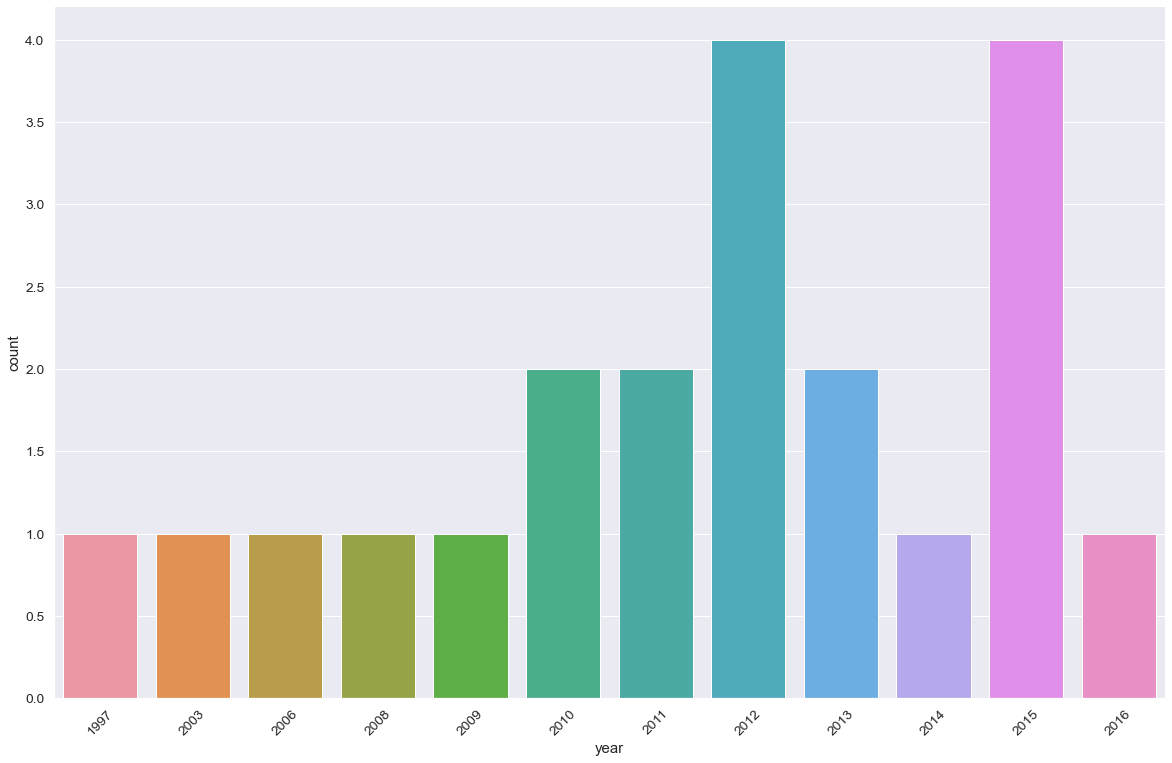

In [36]:
# Plotting High-revenue and high-vote_count movies according to their release year
chart = sns.catplot(x="year", data=high_return, kind="count")
chart.set_xticklabels(rotation=45)

plt.gcf().set_size_inches(20, 12)

##### Observations:
###### After Titanic (1997) which was the first movie to reach 1 billion dollar mark, many more movies passed the threshold in 2010, 2011, 2012, 2013 and 2015 
###### There has been an increase in the revenue of movies filmed till 2012 which showed the peak revenue generated, and although it decreased sharply for 2013 and 2014 yet, it again increased in 2015

### Trend Analysis of vote_average of movies

In [37]:
np.log10(3000)

3.4771212547196626

In [38]:
# Extracting and printing the sorted sub-dataset of title, vote_average, vote_count and year of the movies for which vote_count is greater than 3000
df_clean[df_clean['vote_count'] > 3.477][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
1881,The Shawshank Redemption,8.5,3.914132,1994
3337,The Godfather,8.4,3.770410,1972
3865,Whiplash,8.3,3.628900,2014
2294,Spirited Away,8.3,3.584444,2001
1818,Schindler's List,8.3,3.636488,1993
3232,Pulp Fiction,8.3,3.925776,1994
662,Fight Club,8.3,3.973774,1999
2731,The Godfather: Part II,8.3,3.523616,1974
809,Forrest Gump,8.2,3.899164,1994
690,The Green Mile,8.2,3.607348,1999


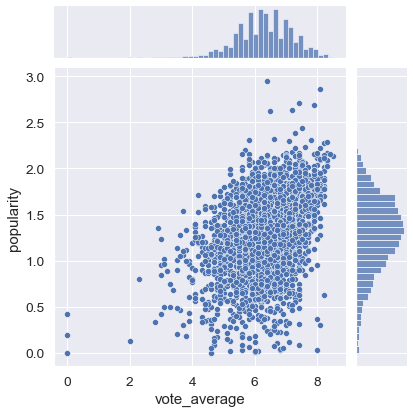

In [39]:
# plotting the correlation graph between vote_average and popularity
sns.jointplot(x='vote_average', y='popularity', data=df_clean)

### Observations:
#### Some corelation between vote_average and popularity is observed.
#### The movies that have high vote_average doesn't necessarily have to be highly popular.
#### The relation is mostly linear.

### Genre feature Analysis

In [40]:
# Extracting the number of of each genre used throughout the total dataset
Movies = []
for genre in genres:
    Movies.append(df_clean[genre].value_counts()[1])
Movies

[919,
 666,
 347,
 442,
 533,
 1449,
 984,
 178,
 362,
 57,
 1140,
 576,
 378,
 278,
 132,
 108,
 112,
 30,
 4,
 2]

In [41]:
pop_genre = pd.DataFrame(Movies, genres).reset_index()
pop_genre

,index,0
0,Action,919
1,Adventure,666
2,Fantasy,347
3,Science Fiction,442
4,Crime,533
5,Drama,1449
6,Thriller,984
7,Animation,178
8,Family,362
9,Western,57


In [42]:
# Creating a new dataframe to store the genres and their count in a sorted order
pop_genre = pd.DataFrame(Movies, genres).reset_index()
pop_genre.columns = ['genre', 'movies']
pop_genre.sort_values(by='movies', inplace=True, ascending=False, ignore_index=True)
pop_genre

,genre,movies
0,Drama,1449
1,Comedy,1140
2,Thriller,984
3,Action,919
4,Adventure,666
5,Romance,576
6,Crime,533
7,Science Fiction,442
8,Horror,378
9,Family,362


<AxesSubplot:xlabel='genre', ylabel='movies'>

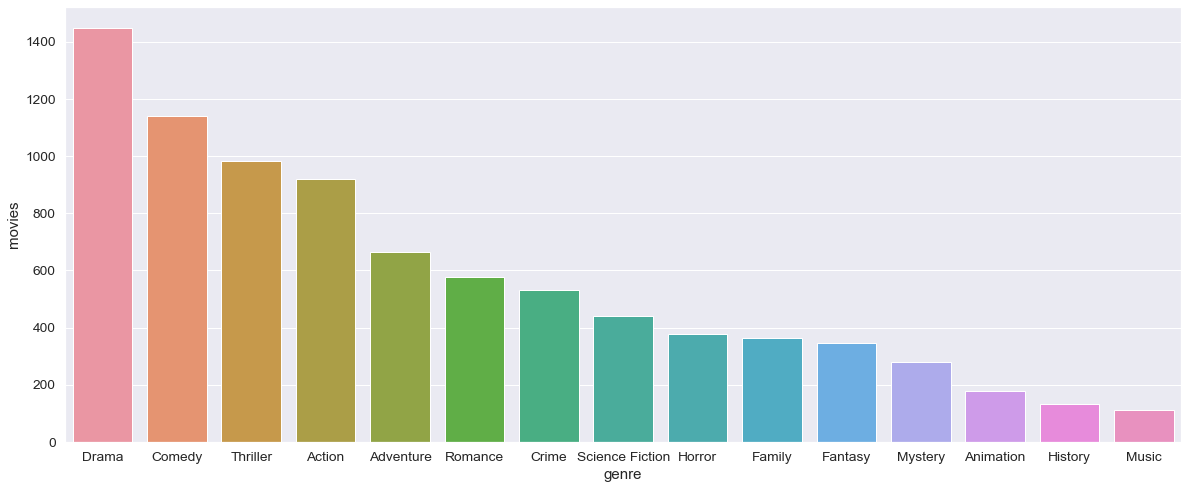

In [43]:
# Plotting the first 15 genres and their movie count
plt.figure(figsize=(20,8))
sns.barplot(x='genre', y='movies', data=pop_genre.head(15))

### General Movie Trend Analysis

In [44]:
# Checking the most expensive movie ever made
df_cost = df_clean[df_clean['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False)
df_cost.head(10)

,title,budget,revenue,return,year
17,Pirates of the Caribbean: On Stranger Tides,8.579784,9.019413,2.751878,2011
1,Pirates of the Caribbean: At World's End,8.477121,8.982723,3.203333,2007
7,Avengers: Age of Ultron,8.447158,9.147801,5.019299,2015
4,John Carter,8.414973,8.453531,1.092843,2012
6,Tangled,8.414973,8.772171,2.276134,2010
5,Spider-Man 3,8.411620,8.949815,3.452991,2007
13,The Lone Ranger,8.406540,7.950802,0.350157,2013
19,The Hobbit: The Battle of the Five Armies,8.397940,8.980467,3.824079,2014
3,The Dark Knight Rises,8.397940,9.035405,4.339756,2012
8,Harry Potter and the Half-Blood Prince,8.397940,8.970328,3.735837,2009


In [45]:
# Printing the Highest Budget that was expended by "Pirates of the Caribbean: On Stranger Tides"
10 ** df_cost['budget'].max()

380000000.9999994

In [46]:
# Checking the highest grossing movies of all time
top_gross = df_clean[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
top_gross

,title,budget,revenue,year
0,Avatar,8.374748,9.445287,2009
25,Titanic,8.301030,9.266004,1997
16,The Avengers,8.342423,9.181717,2012
28,Jurassic World,8.176091,9.179991,2015
44,Furious 7,8.278754,9.177897,2015
7,Avengers: Age of Ultron,8.447158,9.147801,2015
124,Frozen,8.176091,9.105244,2013
31,Iron Man 3,8.301030,9.084734,2013
546,Minions,7.869232,9.063232,2015
26,Captain America: Civil War,8.397940,9.061944,2016


In [47]:
10 ** top_gross['revenue'][0]

2787965088.000003

<AxesSubplot:xlabel='year'>

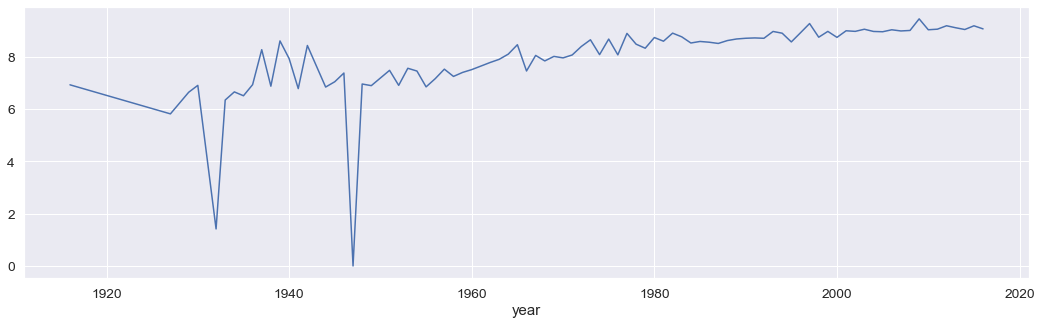

In [48]:
# Checking the trend of revenue over the years
plt.figure(figsize=(18,5))
year_revenue = df_clean.groupby('year')['revenue'].max()
year_revenue.plot(kind='line')

### Observations:
#### Revenue has been more or less steadily increasing over the years

# Part 3: Predictive and Comparison Modeling
### Linear/logistic regression and random forest will be used to perform prediction for regression and classification. We will use the regression models to predict revenue, and we will use classification models to classify whether a movie was profitable. Addtionally sets will be seperated randomly and trained/tested for BestRandomForestClassifier & EasyEnsembleClassifer to determine if these are viable options

### Defining Variables and Instantiating Predictive Models
#### Instantiate regression and classification models. Code provided prepares the variables and outcomes we will use for model analysis

In [49]:
X_df = df_clean.filter(['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign'], axis=1)

In [50]:
X = X_df
# Create our target
y = df_clean['profitable']
X.dtypes

budget             float64
popularity         float64
runtime            float64
vote_count         float64
vote_average       float64
Action               int64
Adventure            int64
Fantasy              int64
Science Fiction      int64
Crime                int64
Drama                int64
Thriller             int64
Animation            int64
Family               int64
Western              int64
Comedy               int64
Romance              int64
Horror               int64
Mystery              int64
War                  int64
History              int64
Music                int64
Documentary          int64
TV Movie             int64
Foreign              int64
dtype: object

In [51]:
X.describe()

,budget,popularity,runtime,vote_count,vote_average,Action,Adventure,Fantasy,Science Fiction,Crime,...,Comedy,Romance,Horror,Mystery,War,History,Music,Documentary,TV Movie,Foreign
count,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,...,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000,3266.000000
mean,7.278334,1.292131,2.038060,2.604175,6.271341,0.281384,0.203919,0.106246,0.135334,0.163197,...,0.349051,0.176363,0.115738,0.085119,0.033068,0.040416,0.034293,0.009186,0.000612,0.001225
std,0.740971,0.405928,0.082333,0.631083,0.894677,0.449743,0.402971,0.308200,0.342132,0.369602,...,0.476743,0.381187,0.319959,0.279102,0.178841,0.196964,0.182008,0.095415,0.024742,0.034980
min,0.301030,0.000688,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.041590,1.986772,2.204120,5.700000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.397940,1.317127,2.029384,2.645913,6.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.740363,1.575985,2.082785,3.042477,6.900000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.579784,2.942792,2.530200,4.138397,8.500000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Check the balance of our target values
y.value_counts()

1    2267
0     999
Name: profitable, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train.shape

(2449, 25)

In [54]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
# Instantiate
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fit
brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [55]:
# Calculated the balanced accuracy score
y_pred = brfc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7563359636144447

In [56]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.58      0.78      0.73      0.67      0.76      0.57       264
          1       0.87      0.73      0.78      0.80      0.76      0.57       553

avg / total       0.78      0.75      0.76      0.76      0.76      0.57       817



In [57]:
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

vote_count: (0.2656584759262086)
popularity: (0.2308262573538584)
budget: (0.11342322471383548)
vote_average: (0.11202255027404627)
runtime: (0.1018571843920753)
Drama: (0.019403511436826146)
Action: (0.015322614360619737)
Comedy: (0.01518830785857698)
Crime: (0.013792074962618172)
Romance: (0.013547436866704522)
Adventure: (0.013365058207903634)
Thriller: (0.013316194943239172)
Science Fiction: (0.013069482110851294)
Family: (0.008821243535131541)
Fantasy: (0.008179411421530067)
Horror: (0.008073920873741054)
Mystery: (0.007931017744859986)
Animation: (0.005336743162455857)
History: (0.004891573225047635)
Music: (0.004854174865804161)
Western: (0.004214882747163911)
War: (0.004212465667651792)
Documentary: (0.00251910011719436)
Foreign: (0.00017309323205600967)
TV Movie: (0.0)


In [58]:
from imblearn.ensemble import EasyEnsembleClassifier
# Instantiate
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# Fit
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [59]:
y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7608567592744808

In [60]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.59      0.78      0.74      0.67      0.76      0.58       264
          1       0.88      0.74      0.78      0.80      0.76      0.58       553

avg / total       0.78      0.75      0.77      0.76      0.76      0.58       817



In [61]:
y = df_clean.profitable
X = X_df

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [62]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [63]:
X_train_scaled.shape

(2449, 25)

In [64]:
import tensorflow as tf
number_input_features = len(X_train_scaled[0])
h_layer1 = 80
h_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=h_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=h_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2080      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,541
Trainable params: 4,541
Non-trainable params: 0
_________________________________________________________________


2022-05-25 15:40:52.965165: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [65]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
77/77 [==============================] - 1s 3ms/step - loss: 0.5662 - accuracy: 0.7113
Epoch 2/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7811
Epoch 3/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8040
Epoch 4/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4190 - accuracy: 0.8056
Epoch 5/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8199
Epoch 6/100
77/77 [==============================] - 0s 6ms/step - loss: 0.4046 - accuracy: 0.8212
Epoch 7/100
77/77 [==============================] - 0s 6ms/step - loss: 0.3982 - accuracy: 0.8228
Epoch 8/100
77/77 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8244
Epoch 9/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.8244
Epoch 10/100
77/77 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.8277
Epoch 11/

77/77 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9241
Epoch 84/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9175
Epoch 85/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9216
Epoch 86/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1971 - accuracy: 0.9204
Epoch 87/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9249
Epoch 88/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9253
Epoch 89/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1917 - accuracy: 0.9261
Epoch 90/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1936 - accuracy: 0.9232
Epoch 91/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1854 - accuracy: 0.9290
Epoch 92/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9277
Epoch 93/100


In [67]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 0s - loss: 0.8059 - accuracy: 0.7319 - 213ms/epoch - 8ms/step
Loss: 0.8059176802635193, Accuracy: 0.7319461703300476


### Steps
#### Instantiate LinearRegression(), LogisticRegression(), RandomForestRegressor(), and RandomForestClassifier() objects, and assign them to linear_regression, logistic_regression, forest_regression, and forest_classifier, respectively
#### For the random forests models, specify max_depth=4 and random_state=0 initially

In [68]:
# Define all variables and outcomes from `df`.
regression_target = 'revenue'
classification_target = 'profitable'
all_variables = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df_clean[regression_target]
classification_outcome = df_clean[classification_target]
variables = df_clean[all_variables]

# Instantiate all regression models and classifiers.
linear_regression = LinearRegression(fit_intercept=True, normalize=True)
logistic_regression = LogisticRegression(max_iter=1000)
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

### Defining Metrics for scoring our Models
#### Create two functions that compute a model's score. For regression models, use correlation as the score. For classification models,  use accuracy as the score.

### Steps
#### Define a function called correlation with arguments estimator, X, and y. The function should compute the correlation between the observed outcome y and the outcome predicted by the model.
#### To obtain predictions, the function should first use the fit method of estimator and then use the predict method from the fitted object.
#### The function should return the first argument from r2_score comparing predictions and y.
#### Define a function called accuracy with the same arguments and code, and computing the accuracy_score for comparing predictions and y.

In [69]:
def correlation(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return r2_score(y, predictions)

def accuracy(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return accuracy_score(y, predictions)

### Performance of Baseline Regression Models
#### Compute the cross-validated performance for the linear and random forest regression models.

### Steps
#### Call cross_val_score using linear_regression and forest_regression as models. Store the output as linear_regression_scores and forest_regression_scores, respectively.
#### Set the parameters cv=10 to use 10-fold cross-validation and scoring=correlation to use our correlation function defined in the previous segment.
#### Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.

Linear Regression Scores: [0.34629263 0.18048078 0.26013231 0.25660351 0.29642796 0.18214009
 0.23756296 0.27476138 0.36637537 0.38254666] 
Forest Regression Scores: [0.82735263 0.58048084 0.53047469 0.52380228 0.61230199 0.47901289
 0.45999719 0.54058345 0.56969312 0.55119326]
Linear Regression Score: 0.2783323656675956 
Forest Regression Scores: 0.5674892343833865


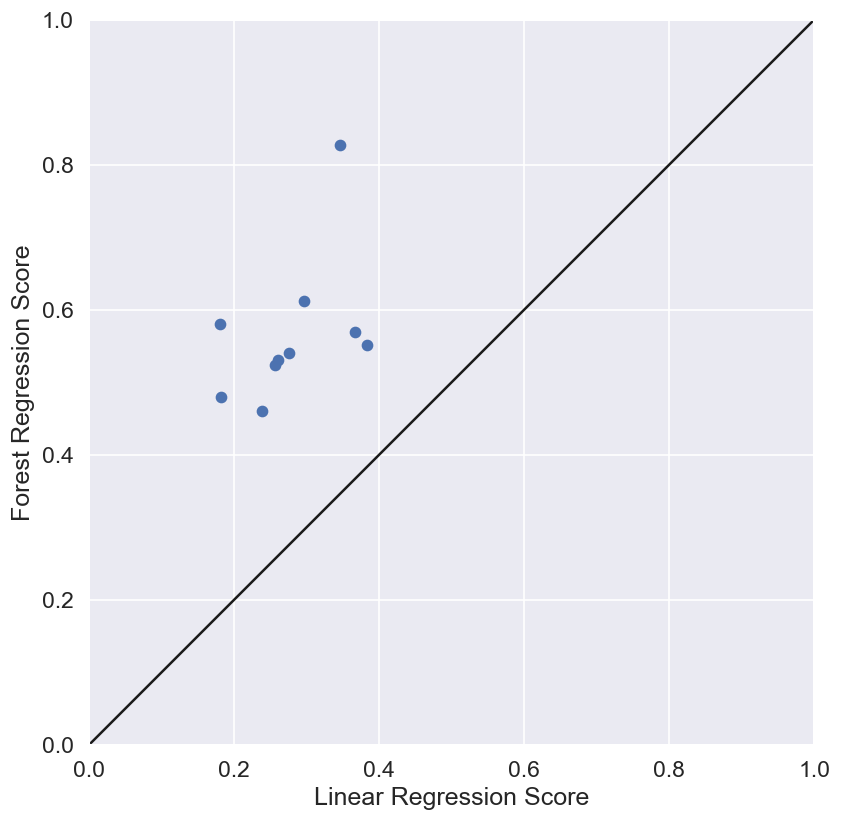

In [70]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores = cross_val_score(linear_regression, variables, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, variables, regression_outcome, cv=10, scoring=correlation)
# Plot Results
plt.figure(figsize=(8,8), facecolor='w', dpi=120)
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# print the scores
print("Linear Regression Scores:", linear_regression_scores, "\nForest Regression Scores:", forest_regression_scores)

# Print the mean scores
print("Linear Regression Score:", np.mean(linear_regression_scores), "\nForest Regression Scores:", np.mean(forest_regression_scores))

# Show the plot.
plt.show()

### 10-fold cross-validation of -

#### forest_regression scores range from 0.4 to 0.6 and there is one above 0.8

#### linear_regression scores range from 0.2 to 0.4

### This clearly shows that the baseline model for forest_regression works better than that of linear_regression

In [71]:
# Print the importance of each variable in the random forest regression
forest_regression.fit(variables, regression_outcome)    
features_rank = sorted(zip(variables, forest_regression.feature_importances_), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

0.8016390677797139: (vote_count)
0.019050344091316975: (vote_average)
0.05534691637291769: (runtime)
0.026043903447539825: (popularity)
0.07132057000471163: (budget)
0.0006820073505829173: (Western)
9.898857548774982e-05: (War)
0.002824899282508506: (Thriller)
0.008240298767185465: (TV Movie)
0.0008133837788099382: (Science Fiction)
0.00036163165189322945: (Romance)
0.0011218483371873934: (Mystery)
0.001194046219742911: (Music)
0.0015573959675423367: (Horror)
0.00015659674595317843: (History)
0.0: (Foreign)
0.0027289839580113885: (Fantasy)
0.00024311875449270812: (Family)
0.0022280473912703494: (Drama)
0.00086894900979748: (Documentary)
0.002305026324866317: (Crime)
0.0002672185377655574: (Comedy)
0.0: (Animation)
0.0005655126922147282: (Adventure)
0.0003412449584876833: (Action)


### Performance of Baseline Classification Models
#### Compute cross-validated performance for the logistic and random forest classification models.

### Steps
#### Call cross_val_score using logistic_regression and forest_classifier as models. Store the output as logistic_regression_scores and forest_classification_scores, respectively.
#### Set the parameters cv=10 to use 10-fold cross-validation and scoring=accuracy to use our accuracy function defined in the previous exercise.
#### Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the accuracy of predicted profitability for each cross-validation fold using the logistic and random forest classification models.

Logistic Regression Scores: [0.91131498 0.85626911 0.89602446 0.87461774 0.84097859 0.83792049
 0.84355828 0.82822086 0.80981595 0.80368098] 
Forest Classification Scores: [0.95412844 0.95412844 0.97859327 0.96330275 0.92966361 0.91743119
 0.96625767 0.92331288 0.88957055 0.84969325]
Logistic Regression Score: 0.8502401455882629 
Forest Classification Scores: 0.9326082062250238


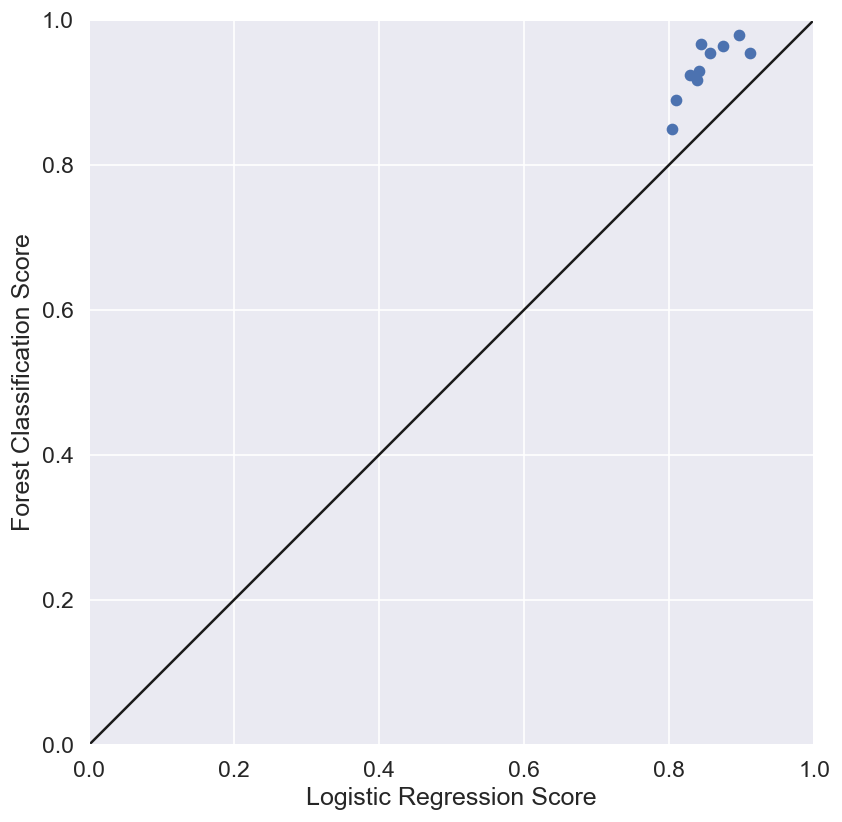

In [72]:
# Determine the cross-validated accuracy for logistic and random forest models
logistic_regression_scores = cross_val_score(logistic_regression, variables, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, variables, classification_outcome, cv=10, scoring=accuracy)
# Plot Results
plt.figure(figsize=(8,8), facecolor='w', dpi=120)
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Logistic Regression Score")
plt.ylabel("Forest Classification Score")

# print the scores
print("Logistic Regression Scores:", logistic_regression_scores, "\nForest Classification Scores:", forest_classification_scores)

# Print the mean scores
print("Logistic Regression Score:", np.mean(logistic_regression_scores), "\nForest Classification Scores:", np.mean(forest_classification_scores))

# Show the plot.
plt.show()

### 10-fold cross-validation of -

#### forest_classification scores range mainly from 0.9 to 1

#### logistic_regression scores range from 0.8 to 0.9

### Shows that forest_classification works a bit better than logistic_regression

In [73]:
# Print the importance of each variable in the random forest classifier
forest_classifier.fit(variables, classification_outcome)    
features_rank = sorted(zip(variables, forest_classifier.feature_importances_), reverse=True)
for feature in features_rank:
    print(f"{feature[1]}: ({feature[0]})")

0.44156410567292304: (vote_count)
0.10339440694950522: (vote_average)
0.02813729038888112: (runtime)
0.3427839853055447: (popularity)
0.039064576040475384: (budget)
0.0015897419599242505: (Western)
0.0019618212319431534: (War)
0.00162669388663943: (Thriller)
0.001134528217121779: (TV Movie)
0.002382317843581393: (Science Fiction)
0.0020545366134571276: (Romance)
0.003261795662535635: (Mystery)
0.0013239171461376495: (Music)
0.001400402523692087: (Horror)
0.0008803218713849203: (History)
0.0005735743648073027: (Foreign)
0.0014144243626688286: (Fantasy)
0.002370234788947726: (Family)
0.013773037323794224: (Drama)
0.00045494804734764105: (Documentary)
0.0012799932798249986: (Crime)
0.0011844887375517567: (Comedy)
0.0017512389569221065: (Animation)
0.0027845415011326672: (Adventure)
0.0018530773232558887: (Action)


### Improving Performance of Predictive Models
#### In the Baseline Regression and Classification Models, it was evident that predicting revenue was only moderately successful while predicting profitablity was very successful. It might be the case that predicting movies that generated precisely no revenue is difficult. In the next three segments,  these movies will be excluded, and rerun the models to determine if the fits improve. In this segment, I will rerun the regression analysis for this subsetted dataset. Although the target is to improve the regression models, I will still re-train our classification models too for an even better prediction than before.

### Steps
##### Define positive_revenue_df as the subset of movies in df with revenue greater than zero.
#### Code is provided below that creates new instances of model objects. Change the max_depth parameter of RandomForest models from  to  to increase the accuracy of our model. Replace all instances of df with positive_revenue_df.

In [75]:
positive_revenue_df = df_clean[df_clean.revenue > 0]

# Replace the dataframe in the following code.

regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]
variables = positive_revenue_df[all_variables]

# Reinstantiate all regression models and classifiers changing the "max_depth" parameter of our RandomForest Regressor and Classifier.
linear_regression = LinearRegression(fit_intercept=True, normalize=True)
logistic_regression = LogisticRegression(max_iter=1000)
forest_regression = RandomForestRegressor(max_depth=20, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=20, random_state=0)

### Performance of Optimized Regression Models
#### Compute the cross-validated performance for the optimized linear and random forest regression models for positive revenue movies only.

### Steps
#### Call cross_val_score using linear_regression and forest_regression as models. Store the output as linear_regression_scores and forest_regression_scores, respectively.
#### Set the parameters cv=10 to use 10-fold cross-validation and scoring=correlation to use our correlation function defined in the previous exercise.
#### Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the correlation between actual and predicted revenue for each cross-validation fold using the optimized linear and random forest regression models.

Linear Regression Scores: [0.69499467 0.65469345 0.55611339 0.53935215 0.5282503  0.49612886
 0.46010822 0.40262575 0.59526262 0.34963542] 
Forest Regression Scores: [0.94218972 0.9443852  0.91657342 0.9157389  0.90042569 0.8955985
 0.89263917 0.90317359 0.9304958  0.87452605]
Linear Regression Score: 0.5277164831925377 
Forest Regression Scores: 0.9115746031729538


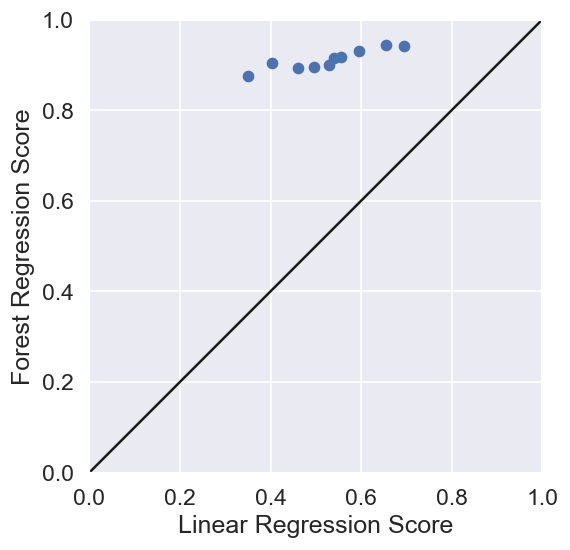

[('TV Movie', 0.0),
 ('Foreign', 0.0001951957463406404),
 ('Documentary', 0.0007567776409663647),
 ('History', 0.0011471648822844514),
 ('Western', 0.0016407820960412307),
 ('Animation', 0.002397877539520455),
 ('Music', 0.002946669490284031),
 ('War', 0.003304843375298297),
 ('Family', 0.004043559232404994),
 ('Fantasy', 0.00416928892040611),
 ('Horror', 0.004290840721428187),
 ('Adventure', 0.004416956660460765),
 ('Mystery', 0.004598713235178292),
 ('Romance', 0.004823908282913866),
 ('Action', 0.005377041323100831),
 ('Comedy', 0.006156013393299106),
 ('Crime', 0.006168237475322609),
 ('Science Fiction', 0.0062933246215915875),
 ('Thriller', 0.007034725373585503),
 ('Drama', 0.007446236132483877),
 ('vote_average', 0.052919822266391706),
 ('runtime', 0.05936054636151042),
 ('popularity', 0.08400605646173301),
 ('budget', 0.29309635284196606),
 ('vote_count', 0.4334090659254874)]

In [76]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores = cross_val_score(linear_regression, variables, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, variables, regression_outcome, cv=10, scoring=correlation)

# Plot Results
plt.figure(figsize=(5,5), facecolor='w', dpi=120)
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")

# print the scores
print("Linear Regression Scores:", linear_regression_scores, "\nForest Regression Scores:", forest_regression_scores)

# Print the mean scores
print("Linear Regression Score:", np.mean(linear_regression_scores), "\nForest Regression Scores:", np.mean(forest_regression_scores))

# Show the plot.
plt.show()

# Print the importance of each variable in the random forest regression.
forest_regression.fit(variables, regression_outcome)    
sorted(list(zip(all_variables, forest_regression.feature_importances_)), key=lambda tup: tup[1])

#### 10-fold Cross-Validation of -

#### Optimized forest_regressor score for positive revenue data range around 0.9

#### linear_regression score for positive evenue data range from 0.4 to 0.7 which is quite good for a linear model

#### Here, too, the forest_regression model works better than the linear_regression model. There is alsosubstantial improvement in the performance of our regression models.
#### Code is provided that prints the importance of each variable in predicting revenue using the random forests regresssor.
#### vote_count, budget and popularity are the most important features in predicting revenue

### Performance of Optimized Classification Model
#### Compute cross-validated performance for the logistic and random forest classification models for positive revenue movies only.

### Steps
#### Call cross_val_score using logistic_regression and forest classifer as models. Store the output as logistic_regression_scores and forest_classification_scores, respectively.
#### Set the parameters cv=10 to use 10-fold cross-validation and scoring=accuracy to use our accuracy function defined in the previous segment.
#### Plotting code has been provided to compare the performance of the two models. Use plt.show() to plot the accuracy between actual and predicted profitability for each cross-validation fold using the logistic and random forest classification models.

Logistic Regression Scores: [0.9112628  0.86986301 0.85273973 0.85958904 0.8390411  0.8390411
 0.8630137  0.85273973 0.81164384 0.80479452] 
Forest Classification Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Logistic Regression Score: 0.8503728552059471 
Forest Classification Scores: 1.0


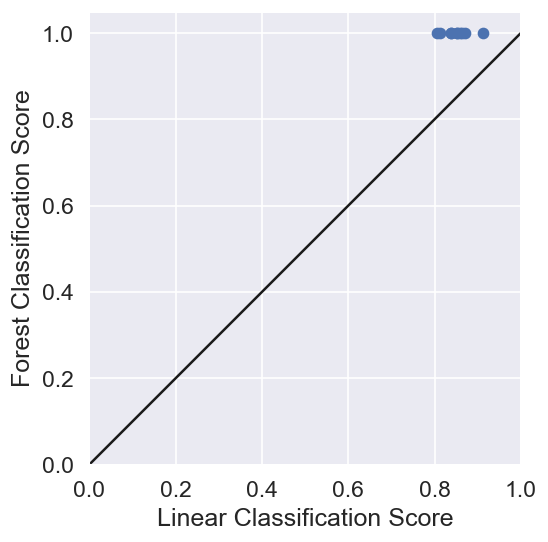

[('TV Movie', 0.0),
 ('Foreign', 0.0012059174628992477),
 ('Documentary', 0.0027305137496895344),
 ('Western', 0.004559226052851061),
 ('Animation', 0.004858198501389),
 ('History', 0.005601369717735389),
 ('War', 0.0057642920441868875),
 ('Music', 0.007386140216607966),
 ('Family', 0.008097415264685132),
 ('Fantasy', 0.009862527517590976),
 ('Mystery', 0.010696849389787795),
 ('Horror', 0.010938245161745167),
 ('Science Fiction', 0.013412525247202637),
 ('Romance', 0.013419507444560573),
 ('Crime', 0.014542753565998472),
 ('Adventure', 0.015379001961693171),
 ('Thriller', 0.01643039787495597),
 ('Comedy', 0.016755810462346803),
 ('Drama', 0.018388985555067017),
 ('Action', 0.01897045011846339),
 ('runtime', 0.1094396711390282),
 ('vote_average', 0.11933623760775135),
 ('budget', 0.1418917784764939),
 ('popularity', 0.2027104310016824),
 ('vote_count', 0.22762175446558794)]

In [77]:
# Determine the cross-validated accuracy for logistic and random forest models.
logistic_regression_scores = cross_val_score(logistic_regression, variables, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, variables, classification_outcome, cv=10, scoring=accuracy)

# Plot Results
plt.figure(figsize=(5,5), facecolor='w', dpi=120)
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1.05) # increasing the limit a bit for proper visualization 
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# print the scores
print("Logistic Regression Scores:", logistic_regression_scores, "\nForest Classification Scores:", forest_classification_scores)

# Print the mean scores
print("Logistic Regression Score:", np.mean(logistic_regression_scores), "\nForest Classification Scores:", np.mean(forest_classification_scores))

# Show the plot.
plt.show()

# Print the importance of each covariate in the random forest classification.
forest_classifier.fit(variables, classification_outcome)
sorted(list(zip(all_variables, forest_classifier.feature_importances_)), key=lambda tup: tup[1])


#### 10-fold Cross-Validation of -

#### Optimized forest_classifier scores for positive revenue data are all perfect and classifies the profitability with 100% accuracy.

#### logistic_regression scores for positive revenue data are still the same as it was during the baseline models, i.e., they range from 0.8 to 0.9 and didn't improve at all.

#### forest classifer obviously performs far better than logistic_regression. In fact, logistic_regression doesn't improve at all and is stuck at the same range but forest classifer improves to a perfection.
#### Code is provided that prints the importance of each variable in predicting profitabilitiy using the random forests classifier.
#### vote_count, popularity and budget are the most important features but the importance of popularity and budget are reversed